## Color Compression of an Image by K-Means Clustering
***

In [1]:
# IMPORT RELEVANT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import datasets
from sklearn import linear_model
from sklearn.svm import SVC, SVR

from sklearn import metrics

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from string import ascii_letters

%matplotlib inline

### Clustering for image color-compression
***
In general, any color picture is made of millions of colors. Our eyes can not even distinguish between fine shades of colors. So, it makes sense to represent a picture in terms of just a few colors whenever the needed. Each of these few colors could be a representative of a group of colors. 

We can perform this grouping by using K-Means clustering of colors given by triplet (R, G, B) for every pixel in the images (red, blue and green pixel intensities). For example, if we have an image 500x400 pixels sharp, there are 20000 such triplets. Our aim whould be to find, say, just 100 such triplets that would be the clusters around which all the other colors could group. Together with this clustering, we also need to find the  membership of every pixel to reconstruct the image.
***
#### Lets begin by reading an image

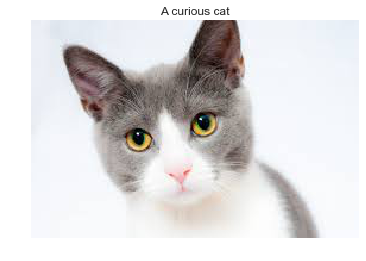

In [4]:
# Read an image from the disk
f = mpimg.imread("./images/cat1.jpg")
# misc.imsave('face.png', f) # uses the Image module (PIL)

# Let us see what this image is.
plt.axis('off')
plt.imshow(f)
plt.title("A curious cat")
plt.show()

In [29]:
type(f)

numpy.ndarray

In [5]:
# The shape of the image
dim = f.shape
print "Original dimension of the image"
print dim


# In place of a matrix let us use a vector for the image.
# Also, scale the pixel intensities 
X = f.reshape(-1,3)/255.0
print "After vectorizing the image, the dimensions are:" 
print X.shape


Original dimension of the image
(183, 276, 3)
After vectorizing the image, the dimensions are:
(50508, 3)


### Finding the color-clusters by K-Means clustering
***

In [6]:
# Create the clustering object with 20 clusters
n_cl =20
km = KMeans(n_clusters=n_cl, max_iter=10000, tol=0.000001, init='random', n_init=20)

In [7]:
# Perform the clustering
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10000,
    n_clusters=20, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-06, verbose=0)

In [9]:
print "The cluster centers are (given by RGB pixel values):"
cs = np.round( km.cluster_centers_, 3)
print cs

The cluster centers are (given by RGB pixel values):
[[ 0.701  0.675  0.663]
 [ 0.405  0.34   0.325]
 [ 0.835  0.803  0.788]
 [ 0.586  0.55   0.534]
 [ 0.756  0.741  0.733]
 [ 0.874  0.719  0.414]
 [ 0.53   0.481  0.466]
 [ 0.882  0.856  0.84 ]
 [ 0.336  0.265  0.249]
 [ 0.975  0.978  0.988]
 [ 0.947  0.943  0.937]
 [ 0.468  0.416  0.401]
 [ 0.91   0.901  0.894]
 [ 0.244  0.175  0.154]
 [ 0.656  0.553  0.275]
 [ 0.958  0.967  0.985]
 [ 0.08   0.066  0.061]
 [ 0.938  0.952  0.975]
 [ 0.912  0.93   0.957]
 [ 0.641  0.61   0.596]]


### Visualizing the color-cluster stripes

In [10]:
# Let's print all the color-clusters in some stripes
centroids = km.cluster_centers_.reshape(1, n_cl,3)
temp = np.zeros((5, n_cl, 3), dtype=int)
color_map = np.add(temp, centroids)
color_map.shape

(5, 20, 3)

The follwing color-stips show the color clusters that the reconstructed image uses.


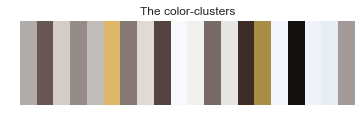

In [12]:
#Different color labels
print("The follwing color-stripes show the color-clusters that the reconstructed image uses.")
plt.axis('off')
plt.imshow(color_map)
plt.title("The color-clusters")
plt.show()

### Membership to color-clusters and Reconstruction

In [13]:
# Get the cluster labels for each color
Xin = km.labels_

km_labels = km.labels_
print km_labels.shape

# The cat image in new colors
Xnew = cs[Xin,:]

# Bring it back to original dimensions
Xnim = Xnew.reshape(dim)

(50508,)


(-0.5, 275.5, 182.5, -0.5)

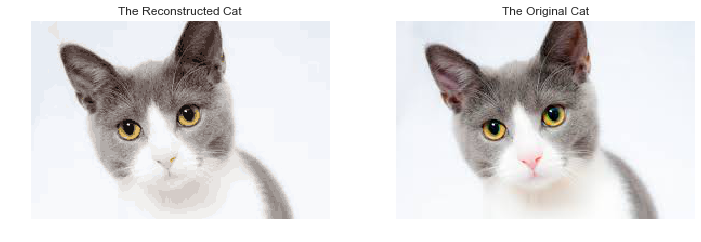

In [16]:
# Print the two pictures
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1, title='The Reconstructed Cat')
ax1.imshow(Xnim)
#ax1.title("The Reconstructed Cat")
plt.axis('off')
ax2 = fig.add_subplot(2,2,2, title='The Original Cat')
ax2.imshow(f)
#ax1.title("The Original Cat")
plt.axis('off')

### Lets create a class that privdes the image compression functionality

In [61]:
class ImageCompressor(object):
    '''
    This class provides the functionality for color compression of images
    
    '''
    def __init__(self,file_name, showOriginal):
        self.f = mpimg.imread(file_name)
        self.dim = f.shape
        self.X = self.f.reshape(-1,3)/255.0
        
        if(showOriginal):
            plt.axis('off')
            plt.imshow(f)
            plt.title("A curious cat")
            plt.show()
    
    def compressImage(self, num_clusters):
        
        # Create the clustering object with 20 clusters
        self.n_cl =num_clusters
        km = KMeans(n_clusters=self.n_cl, max_iter=10000, tol=0.000001, init='random', n_init=20)
        km.fit(self.X)
        
        #Cluster Centers and membership
        self.cs = np.round( km.cluster_centers_, 3)
        self.cluster_labels = km.labels_

    
    def showBaseColors(self,strip_height=5):
        #Different color labels
        # Let's print all the color-clusters in some stripes
        centroids = self.cs.reshape(1, self.n_cl,3)
        temp = np.zeros((strip_height, self.n_cl, 3), dtype=int)
        color_map = np.add(temp, centroids)
        color_map.shape
        
        print("The follwing color-stips show the color clusters that the reconstructed image uses.")
        plt.axis('off')
        plt.imshow(color_map)
        plt.title("The color-clusters")
        plt.show()

    
    def showCompressed(self):
        # Get the cluster labels for each color
        Xin = self.cluster_labels

        #km_labels = km.labels_
        #print km_labels.shape

        # The cat image in new colors
        Xnew = self.cs[Xin,:]

        # Bring it back to original dimensions
        Xnim = Xnew.reshape(dim)
        
        # Print the two pictures
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(2,2,1, title='The Reconstructed Cat')
        ax1.imshow(Xnim)
        #ax1.title("The Reconstructed Cat")
        plt.axis('off')
        ax2 = fig.add_subplot(2,2,2, title='The Original Cat')
        ax2.imshow(f)
        #ax1.title("The Original Cat")
        plt.axis('off')

        pass

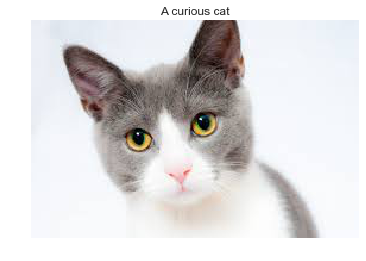

In [62]:
ic = ImageCompressor('./images/cat1.jpg', showOriginal=True)
ic.compressImage(40)

The follwing color-stips show the color clusters that the reconstructed image uses.


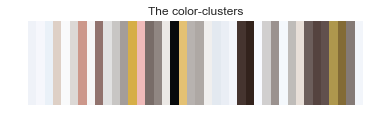

In [59]:
ic.showBaseColors(10)

In [60]:
ic.showCompressed()

IndexError: index 23 is out of bounds for axis 0 with size 20

## Saving, loading and using a trained model
<hr>
We will learn how to use the pickle module to save and load trained models.

In [46]:
# Load the credit card default data
ccd = pd.read_csv("../../data/default_with_dummy.csv", )

ccd.drop(ccd.columns[0], axis=1, inplace=True)
ccd.head(2)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,0,0,0,0,1,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,0,0,0,0,0,1,0,1


In [48]:
# Get X and y
X = ccd.iloc[:,0:33]
y = ccd.iloc[:,33]

In [49]:
# Split Data into Train and Test subsets:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)

In [50]:
# NORMALIZE THE DATA: Try the different methods, look at the details by pressing shift+tab

scaler = MinMaxScaler()
scaler.fit(X_train) # Normalize only the training data
X_train_n = scaler.transform(X_train)

In [51]:
lrm = linear_model.LogisticRegression(penalty='l1')
# Train the model
lrm.fit(X_train_n, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
# Training Accuracy
print("Train Accuracy: {}".format(100*lrm.score(X_train_n, y_train)))

Train Accuracy: 81.1583333333


### Using Pickle to save and load models

In [54]:
#Let us save the normalizer
pickle.dump(scaler, open("../../data/Normalizer_Lec11.pkl", 'wb'))

# SAVE THE  MODEL
pickle.dump(lrm, open("../../data/lrm_Lec11.pkl", 'wb'))

In [57]:
#Normalizer or Standardized or Binarization
scaler_loaded = pickle.load(open("../../data/Normalizer_Lec11.pkl", 'rb'))

# Load trained Logistic Reg Model
lrm_loaded = pickle.load(open("../../data/lrm_Lec11.pkl", 'rb'))

In [58]:
#Transform the data using the original scaler
X_test_n = scaler_loaded.transform(X_test)

# Test Accuracy
print("Test Accuracy: {}".format(100*lrm_loaded.score(X_test_n, y_test)))

# Use the loaded model for predictions
lrm_loaded.predict(X_test_n[4000:4010,:])

Test Accuracy: 80.55


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])